In [6]:
import numpy as np
from fluid import Fluid
import scipy as sp
from scipy import optimize as op
from scipy.optimize import minimize

import json

import warnings
warnings.filterwarnings("ignore")

In [8]:
from pipe_draft import calculate_pipe_properties

def netPow(x):
        m_dot_c, P_pump_discharge = x

        #Givens
        m_dot_s = 3.24 # mass flow of the continuous supply being sequestered (s for sequestration)
        #State 5 is the incoming sequestration state 
        T5 = 273.15 + 10
        P5 = 6.0e6

        #State 1
        m_dot_1 = m_dot_s + m_dot_c
        T1 = T5 # to match sequestration state
        P1 = P5 #to match sequestration state

        co2 = Fluid('co2')
        s1 = co2.entropy(T=T1, P=P1)
        h1 = co2.enthalpy(T = T1, P = P1)

        #State 2
        m_dot_2 = m_dot_s + m_dot_c
        s2 = s1 #Pump modeled as isentropic
        P2 = P_pump_discharge #Free variable

        h2 = co2.enthalpy(S = s2, P = P2)
        T2 = co2.temperature(S = s2, P = P2)

        pow_in = m_dot_2 * (h2 - h1)

        #State 3
        m_dot_3 = m_dot_c
        T3, P3 = calculate_pipe_properties(T2,P2,mdot=m_dot_3,num_segments=50)
        s3 = co2.entropy(T=T3, P=P3)
        h3 = co2.enthalpy(T = T3, P = P3)

        #State 4
        m_dot_4 = m_dot_c
        s4 = s3 #Turbine modeled as isentropic
        P4 = P1 # Condenser modeled as isobarric

        h4 = co2.enthalpy(S = s4, P = P4)
        pow_out = m_dot_4 * (h3 - h4)
        
        net_pow = (pow_out - pow_in)
        return net_pow
    #except Exception as e:
    #    print(f"caught {e}")
    #    return 1e-12

#t = op.minimize_scalar(net_pow, [param_dict['T_inf'], T_l_init, 275], bounds=(0, np.inf))

In [10]:
cost = lambda x: 1 / netPow(x)
initial_guess = [10,20e6]
print(f"{netPow(initial_guess)} from initial conditions")
result = op.minimize(cost, initial_guess,
                     bounds=[(0,15),(10e6,np.Inf)],
                     method='Nelder-Mead')
 
# Extract the optimal values
optimal_P_pump_discharge = result.x
print(optimal_P_pump_discharge)
# You can also get the minimum value of netPow
minimum_net_pow = netPow(result.x)

print(minimum_net_pow)


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
optimal_P_pump_discharge

array([1.e+01, 2.e+07])

Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


Descending:   0%|          | 0/50 [00:00<?, ?it/s]


caught can't multiply sequence by non-int of type 'numpy.float64'


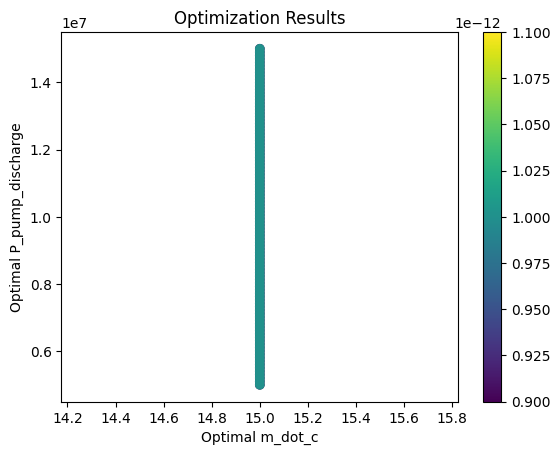

In [ ]:
# Initial guess for the optimization
cost = lambda x: 1 / netPow(x)**2
# Call minimize function


# find the optimal power at each
import matplotlib.pyplot as plt

# Define the range of initial conditions
mdot_range = np.array([15])
pump_range = np.linspace(5e6, 15e6, 100)

# Initialize lists to store the optimal values and minimum net power
optimal_m_dot_c_list = []
optimal_P_pump_discharge_list = []
minimum_net_pow_list = []

# Iterate over each set of initial conditions
for mdot in mdot_range:
    for pump in pump_range:
        initial_guess = [mdot, pump]
        
        # Perform optimization
        #result = op.minimize(cost, initial_guess, bounds=[(0, 500), (0, 100e6)])
        # Extract the optimal values
        optimal_m_dot_c, optimal_P_pump_discharge = initial_guess
        optimal_m_dot_c_list.append(optimal_m_dot_c)
        optimal_P_pump_discharge_list.append(optimal_P_pump_discharge)
        
        # Calculate the minimum net power
        minimum_net_pow = netPow(initial_guess)
        minimum_net_pow_list.append(minimum_net_pow)

# Plot the results
fig, ax = plt.subplots()
ax.scatter(optimal_m_dot_c_list, optimal_P_pump_discharge_list, c=minimum_net_pow_list, cmap='viridis')
ax.set_xlabel('Optimal m_dot_c')
ax.set_ylabel('Optimal P_pump_discharge')
ax.set_title('Optimization Results')
plt.colorbar(ax.scatter(optimal_m_dot_c_list, optimal_P_pump_discharge_list, c=minimum_net_pow_list, cmap='viridis'))
plt.show()

